# lab-customer-analysis-final-round

## 01 - Problem

### *Data description

- Unnamed: Index
- customer: Customer ID
- state: US State
- customer_lifetime_value: CLV is the client economic value for a company during all their relationship
- response: Response to marketing calls (customer engagement)
- coverage: Customer coverage type
- education: Customer education level
- effective_to_date: Effective to date
- employmentstatus: Customer employment status
- gender: Customer gender
- income: Customer income
- location_code: Customer living zone
- marital_status: Customer marital status
- monthly_premium_auto: Monthly premium
- months_since_last_claim: Last customer claim
- months_since_policy_inception: Policy Inception
- number_of_open_complaints: Open claims
- number_of_policies: Number policies
- policy_type: Policy type
- policy: Policy
- renew_offer_type: Renew
- sales_channel: Sales channel (customer-company first contact)
- total_claim_amount: Claims amount
- vehicle_class: Vehicle class
- vehicle_size: Vehicle size
- vehicle_type: Vehicle type

### *Goal

Predict the total_claim_amount by each client

## 02 - Getting data

In [1]:
import pandas as pd

In [2]:
base1 = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
df1 = pd.DataFrame(base1)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## 03 - Cleaning/Wrangling/EDA

In [4]:
df1.columns = df1.columns.str.lower().str.replace(' ','_')

In [5]:
df1.head(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
df1.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
df1.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [11]:
df1.drop(['customer'], axis=1, inplace=True)

In [13]:
categorical_df = df1.select_dtypes('object')
categorical_cols = categorical_df.columns
categorical_df.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [14]:
for i in categorical_cols:
    print(i)
    print(df1[i].value_counts())
    print('------')

state
state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
------
response
response
No     7826
Yes    1308
Name: count, dtype: int64
------
coverage
coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
------
education
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
------
effective_to_date
effective_to_date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153

In [15]:
numerical = df1.select_dtypes('number')
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [16]:
df_num = df1.select_dtypes('number')
df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [17]:
df_cat = df1.select_dtypes('object')
df_cat.columns

Index(['state', 'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns

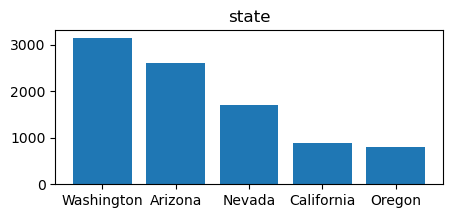

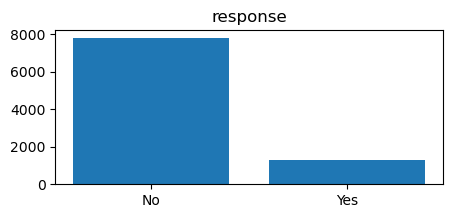

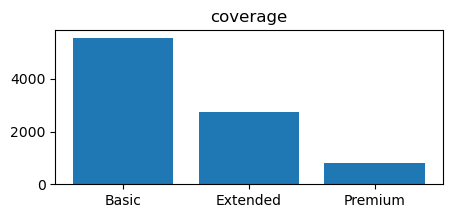

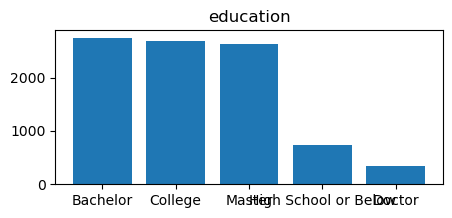

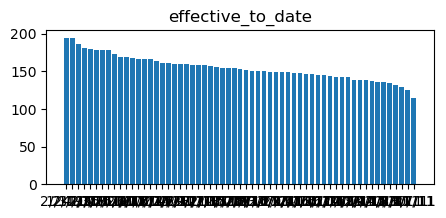

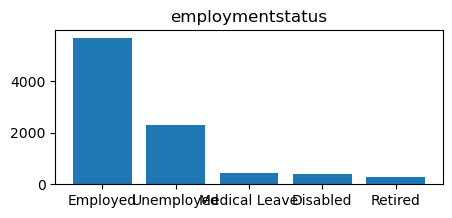

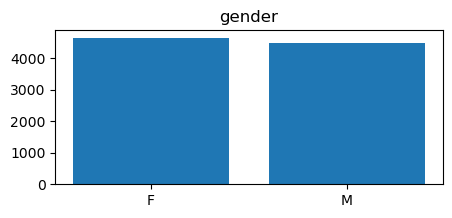

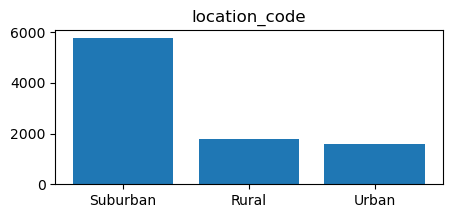

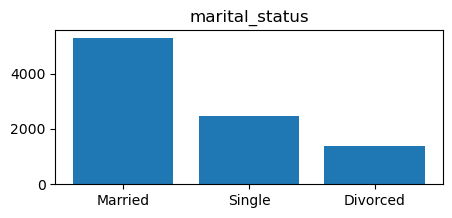

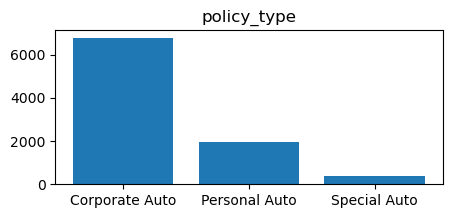

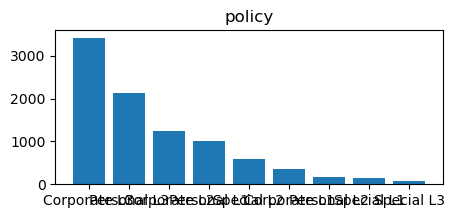

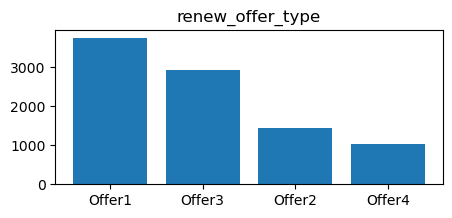

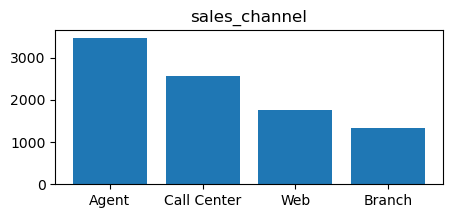

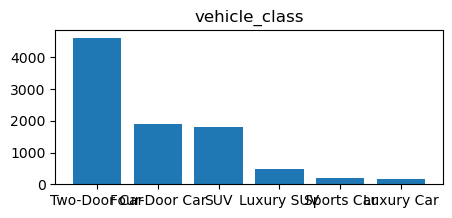

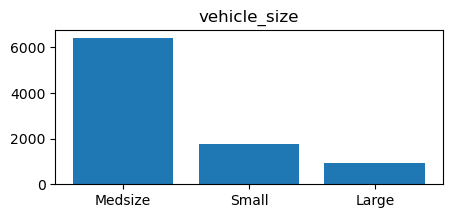

In [22]:
for c in df_cat.columns:
    plt.figure(figsize=(5,2))
    plt.bar(df1[c].unique(),df1[c].value_counts())
    plt.title(c)
    plt.show()

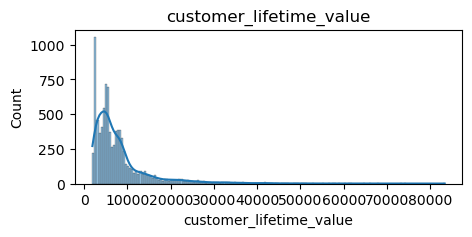

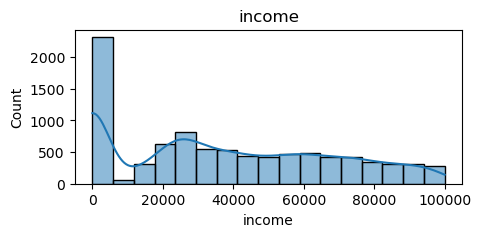

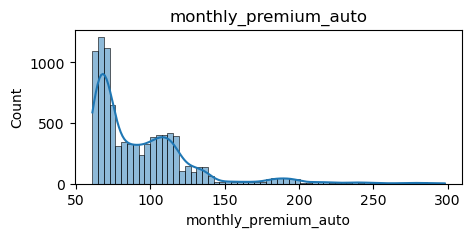

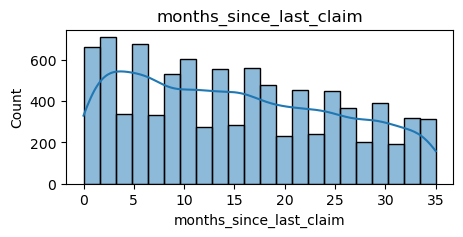

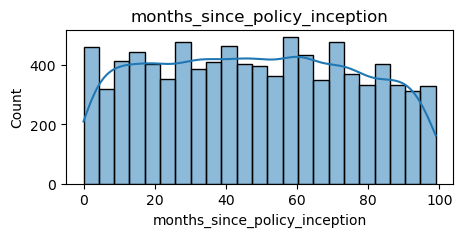

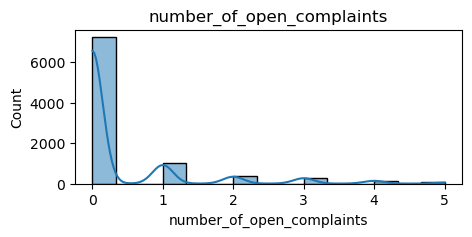

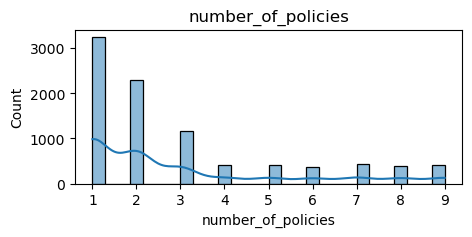

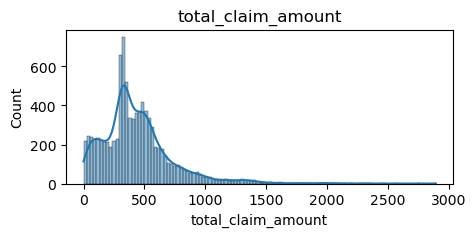

In [24]:
for c in df_num.columns:
    plt.figure(figsize=(5,2))
    sns.histplot(df1[c], kde=True)
    plt.title(c)
    plt.show()

## 04 - Processing Data

<AxesSubplot:xlabel='customer_lifetime_value'>

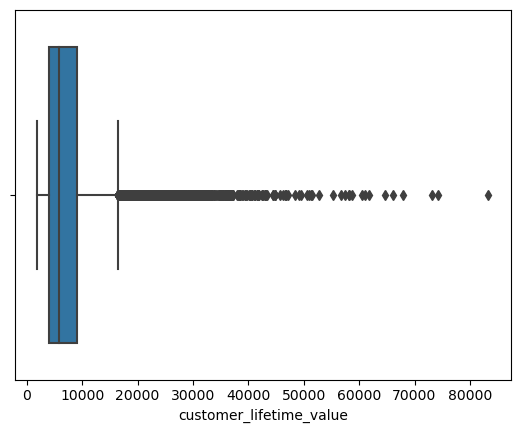

In [25]:
sns.boxplot(x=df_num['customer_lifetime_value'])

In [26]:
q1=np.percentile(df_num['customer_lifetime_value'], 25)   # percentile 25
q3=np.percentile(df_num['customer_lifetime_value'], 75)   # percentile 75
iqr=q3-q1 

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

iqr, upper_limit, lower_limit

(4967.915247000001, 16414.039911750002, -3457.6210762500014)

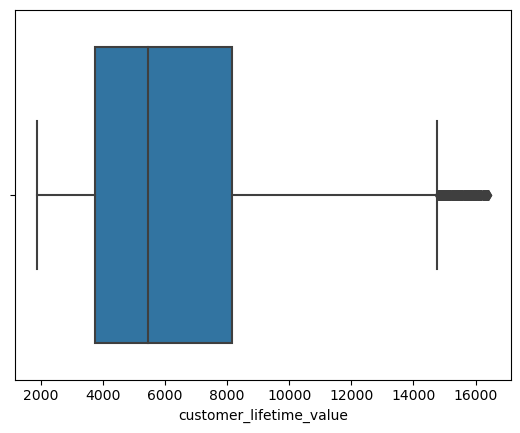

In [27]:
data = df_num[(df_num['customer_lifetime_value']>lower_limit) & (df_num['customer_lifetime_value']<upper_limit)]
sns.boxplot(x=data['customer_lifetime_value'])
plt.show()

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Count'>

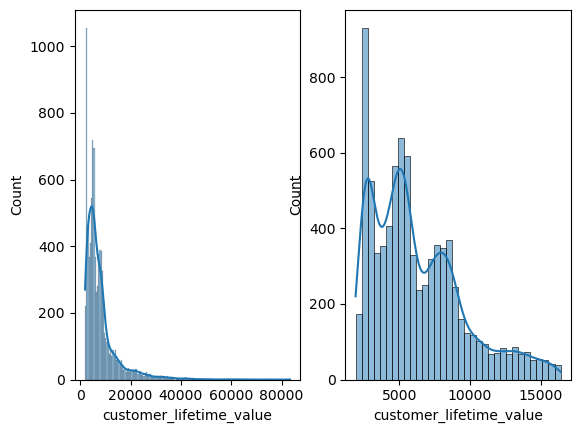

In [28]:
plt.subplot(1,2,1)
sns.histplot(df_num['customer_lifetime_value'], kde=True)

plt.subplot(1,2,2)
sns.histplot(data['customer_lifetime_value'], kde=True)

In [29]:
from sklearn.preprocessing import PowerTransformer

In [32]:
y=df_num['total_claim_amount']
y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 9134, dtype: float64

In [33]:
X = df_num.drop(['total_claim_amount'], axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [34]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
df_X_train_pt = pd.DataFrame(X_train_pt, columns=X_train.columns)
df_X_train_pt.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.154555,0.807677,1.360867,1.657330,1.471319,-0.500344,-1.152021
1,1.102186,-1.655812,1.806474,0.058035,0.799894,-0.500344,0.873446
2,0.434349,0.401585,0.584358,1.188175,0.162640,1.953933,1.126458


In [36]:
X_test_pt = pt.transform(X_test)
df_X_test_pt = pd.DataFrame(X_test_pt, columns=X_train.columns)
df_X_test_pt.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.580388,0.892951,0.782412,-1.675324,0.129050,-0.500344,-1.152021
1,-0.116343,0.148364,-0.709595,-0.698111,-1.431989,-0.500344,0.873446
2,-0.771454,1.079498,0.420686,-1.278645,-0.254527,-0.500344,-1.152021


In [37]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='first', sparse=False)
state_enc = enc.fit_transform(df_cat[['state']])
state_enc = pd.DataFrame(state_enc)
state_enc

/Users/laura.chavez/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
9129,1.0,0.0,0.0,0.0
9130,1.0,0.0,0.0,0.0
9131,1.0,0.0,0.0,0.0
9132,1.0,0.0,0.0,0.0


In [38]:
response_enc = enc.fit_transform(df_cat[['response']])

/Users/laura.chavez/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [39]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le_coverage = le.fit_transform(df_cat[['coverage']])
le_coverage = pd.DataFrame(le_coverage, columns=['coverage'])
le_coverage

/Users/laura.chavez/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,coverage
0,0
1,1
2,2
3,0
4,0
...,...
9129,0
9130,1
9131,1
9132,1


## 05 - Modeling

In [40]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_train = linreg.predict(X_train)
y_pred_test=linreg.predict(X_test)   # model prediction

In [41]:
linreg_pt = LinReg()
linreg_pt.fit(df_X_train_pt, y_train)
y_pred_train_pt = linreg_pt.predict(df_X_train_pt)

train_score_pt=linreg_pt.score(df_X_train_pt, y_train)
train_score_pt

0.4359520131133471

In [42]:
y_pred_test_pt = linreg_pt.predict(df_X_test_pt)
test_score_pt=linreg_pt.score(df_X_test_pt, y_test)
test_score_pt

0.39912607190065963

In [44]:
from sklearn.metrics import mean_squared_error as mse
train_mse = mse(y_pred_train_pt,y_train)
test_mse = mse(y_pred_test_pt,y_test)
train_mse, test_mse

(48242.284953810406, 48604.686125981774)

## 06 - Model Validation

In [46]:
train_score=linreg.score(X_train, y_train) #R2
test_score=linreg.score(X_test, y_test)
train_score, test_score

(0.5217065876763484, 0.508388170168562)

In [47]:
train_mse = mse(y_pred_train,y_train)
test_mse = mse(y_pred_test,y_test)
train_mse, test_mse

(40907.80860013018, 39766.47607320748)

In [48]:
from sklearn.metrics import mean_absolute_error as mae
train_mae = mae(y_pred_train,y_train)
test_mae = mae(y_pred_test,y_test)
train_mae, test_mae

(144.62280853347784, 144.22489077505338)

## 07 - Reporting